<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/Code_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install packages
!pip install pulp
import math


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 34.9 MB/s eta 0:00:00


In [2]:
# Import Libraries
import numpy as np

from pulp import LpMaximize, LpMinimize, LpProblem, LpVariable, lpSum

import pandas as pd

import matplotlib.pyplot as plt



In [3]:
# Load data
wards = ["ward1", "ward2", "ward3", "ward4", "ward5", "ward6", "ward7", "ward8", "ward9", "ward10"]
max_beds_per_ward = {"ward1": 15, "ward2": 10, "ward3": 10, "ward4": 15, "ward5": 10, "ward6": 10, "ward7": 10, "ward8": 15, "ward9":10 , "ward10": 15}

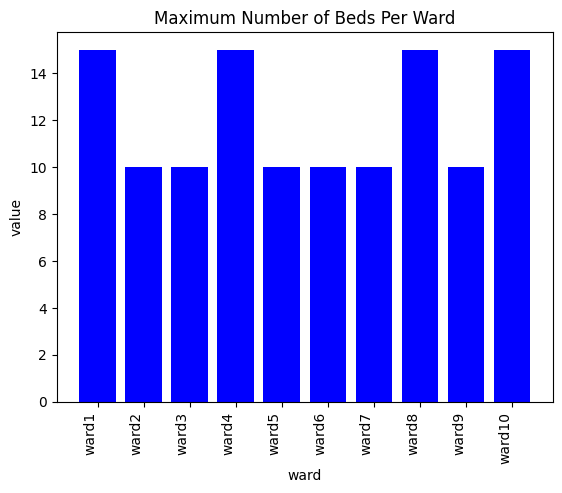

In [22]:
# visualize data

# Convert dictionary keys and values to lists
ward = list(max_beds_per_ward.keys())
value = list(max_beds_per_ward .values())

# Create a bar chart
plt.bar(ward, value, color='blue')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward')
plt.ylabel('value')
plt.title('Maximum Number of Beds Per Ward')

# Show the plot
plt.show()




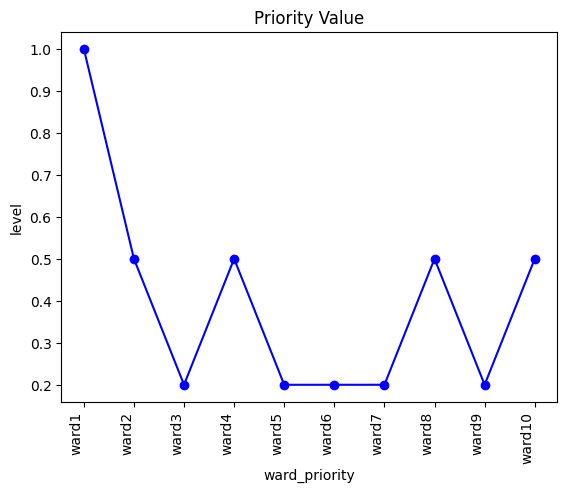

In [56]:
# Defining Priority and visualize
priority_levels = {"ward1":1.0,"ward2":0.5,"ward3":0.2,"ward4":0.5,"ward5":0.2,"ward6":0.2,"ward7":0.2,"ward8":0.5,"ward9":0.2,"ward10":0.5}

# Convert dictionary keys and values to lists
priority = list(priority_levels.keys())
level = list(priority_levels.values())

# Create a bar chart
plt.plot(priority, level, color='blue', marker='o')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward_priority')
plt.ylabel('level')
plt.title('Priority Value')

# Show the plot
plt.show()


In [24]:
# Simulate uncertain demand using a normal distribution
np.random.seed(42)  # Set seed for reproducibility
demand_mean = {"ward1": 10, "ward2": 5, "ward3": 5, "ward4": 10, "ward5": 5, "ward6": 5, "ward7": 4, "ward8": 10, "ward9": 5, "ward10": 10}
demand_std_dev = {"ward1": 3, "ward2": 2, "ward3": 1, "ward4": 3, "ward5":2 , "ward6": 1, "ward7": 2, "ward8": 2, "ward9": 2, "ward10": 3}
demand = {ward: max(0, int(math.ceil(np.random.normal(demand_mean[ward], demand_std_dev[ward])* priority_levels[ward]))) for ward in wards}

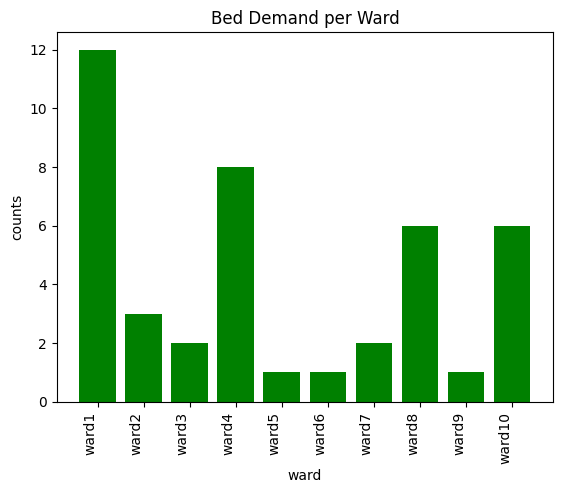

In [25]:
# Visualize Demand
# Convert dictionary keys and values to lists
bed_demand = list(demand.keys())
count = list(demand.values())

# Create a bar chart
plt.bar(bed_demand, count, color='green')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward')
plt.ylabel('counts')
plt.title('Bed Demand per Ward')

# Show the plot
plt.show()

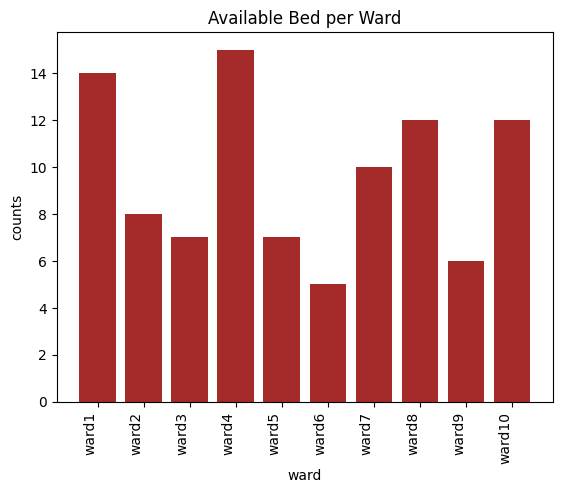

In [26]:
# Real-time bed availability and visualize
real_time_availability = {"ward1":14,"ward2":8,"ward3":7 ,"ward4":15 ,"ward5":7 ,"ward6":5,"ward7":10, "ward8":12, "ward9":6, "ward10":12}

# Convert dictionary keys and values to lists
bed_available = list(real_time_availability.keys())
number = list(real_time_availability.values())

# Create a bar chart
plt.bar(bed_available, number, color='brown')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward')
plt.ylabel('counts')
plt.title('Available Bed per Ward')

# Show the plot
plt.show()



In [27]:
# Create a linear programming problem for minimization
model_min = LpProblem(name="Healthcare_Bed_Minimum_Allocation", sense=LpMinimize)

In [28]:
# Decision Variables: Number of beds assigned to each ward
beds = {ward: LpVariable(name=f"{ward}_beds", lowBound=0, cat="Integer") for ward in wards}


In [29]:
# Objective Function: Minimize the total weighted number of beds
model_min += lpSum(priority_levels[ward] * beds[ward] for ward in wards), "Total_Weighted_Beds"

In [30]:
# Constraints: Demand must be met for each ward, and the number of beds cannot exceed the maximum for each ward
for ward in wards:
    model_min += beds[ward] >= demand[ward], f"Ward_Demand_{ward}"
    model_min += beds[ward] <= max_beds_per_ward[ward], f"Max_Bed_{ward}"
    model_min += beds[ward] <= real_time_availability[ward], f"Real_Time_Availability_{ward}"


In [31]:
# Solve the linear programming problem
model_min.solve()

1

In [32]:
# Display the results
if model_min.status == 1:  # Optimal solution found
    for ward in wards:
        print(f"Minimum number of beds for {ward}: {beds[ward].varValue}")
else:
    print("No optimal solution found.")


Minimum number of beds for ward1: 12.0
Minimum number of beds for ward2: 3.0
Minimum number of beds for ward3: 2.0
Minimum number of beds for ward4: 8.0
Minimum number of beds for ward5: 1.0
Minimum number of beds for ward6: 1.0
Minimum number of beds for ward7: 2.0
Minimum number of beds for ward8: 6.0
Minimum number of beds for ward9: 1.0
Minimum number of beds for ward10: 6.0


In [16]:
# visualize the result
bed_min = {"ward1":12.0,"ward2":3.0,"ward3":2.0,"ward4":8.0,"ward5":1.0,
           "ward6":1.0,"ward7":2.0,"ward8":6.0,"ward9":1.0,"ward10":6.0,}

In [33]:
# Create a linear programming problem for maximization
model_max = LpProblem(name="Healthcare_Bed_Maximum_Allocation", sense=LpMaximize)

In [34]:
# Objective Function: Maximize the total weighted number of beds
model_max += lpSum(priority_levels[ward] * beds[ward] for ward in wards), "Total_Weighted_Beds"

In [35]:
# Constraints: Demand must be met for each ward, and the number of beds cannot exceed the maximum for each ward
for ward in wards:
    model_max += beds[ward] >= demand[ward], f"Ward_Demand_{ward}"
    model_max += beds[ward] <= max_beds_per_ward[ward], f"Max_Bed_{ward}"
    model_max += beds[ward] <= real_time_availability[ward], f"Real_Time_Availability_{ward}"

In [36]:
# Solve the linear programming problem
model_max.solve()

1

In [37]:
# Display the results
if model_max.status == 1:  # Optimal solution found
    for ward in wards:
        print(f"Maximum number of beds for {ward}: {beds[ward].varValue}")
else:
    print("No optimal solution found.")


Maximum number of beds for ward1: 14.0
Maximum number of beds for ward2: 8.0
Maximum number of beds for ward3: 7.0
Maximum number of beds for ward4: 15.0
Maximum number of beds for ward5: 7.0
Maximum number of beds for ward6: 5.0
Maximum number of beds for ward7: 10.0
Maximum number of beds for ward8: 12.0
Maximum number of beds for ward9: 6.0
Maximum number of beds for ward10: 12.0


In [51]:
# visualize the result for max
bed_max = {"ward1":14.0,"ward2":8.0,"ward3":7.0,"ward4":15.0,"ward5":7.0,
           "ward6":5.0,"ward7":10.0,"ward8":12.0,"ward9":6.0,"ward10":12.0,}
bed_max

{'ward1': 14.0,
 'ward2': 8.0,
 'ward3': 7.0,
 'ward4': 15.0,
 'ward5': 7.0,
 'ward6': 5.0,
 'ward7': 10.0,
 'ward8': 12.0,
 'ward9': 6.0,
 'ward10': 12.0}

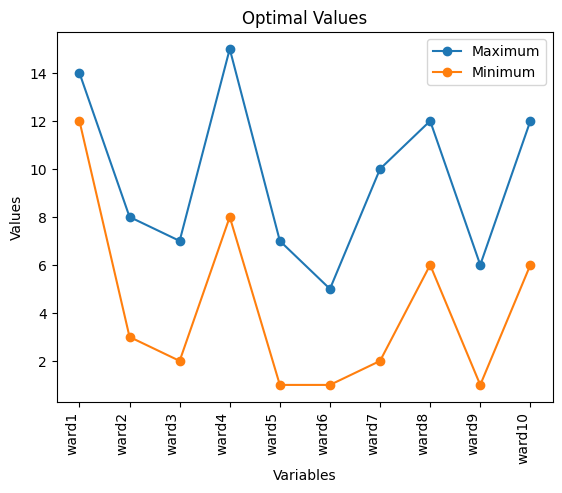

In [52]:
# Extract keys and values
key1, value1 = list(bed_max.keys()), list(bed_max.values())
key2, value2 = list(bed_min.keys()), list(bed_min.values())

# Plot data
plt.plot(key1, value1, label='Maximum', marker='o')
plt.plot(key2, value2, label='Minimum', marker='o')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Optimal Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


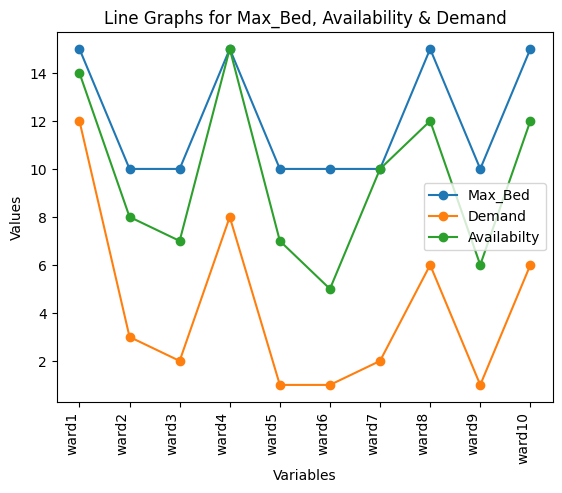

In [53]:
# Extract keys and values
key3, value3 = list(max_beds_per_ward.keys()), list(max_beds_per_ward .values())
key4, value4 = list(demand.keys()), list(demand.values())
key5, value5 = list(real_time_availability.keys()), list(real_time_availability.values())

# Plot data
plt.plot(key3, value3, label='Max_Bed', marker='o')
plt.plot(key4, value4, label='Demand', marker='o')
plt.plot(key5, value5, label='Availabilty', marker='o')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Line Graphs for Max_Bed, Availability & Demand')

# Add legend
plt.legend()

# Show the plot
plt.show()

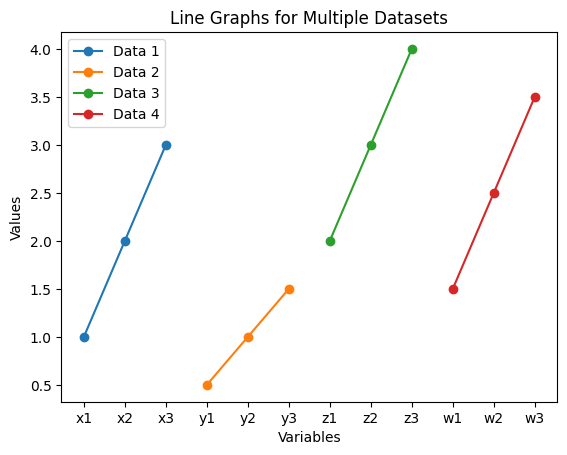

In [47]:
import matplotlib.pyplot as plt

# Sample data
data1 = {"x1": 1, "x2": 2, "x3": 3}
data2 = {"y1": 0.5, "y2": 1, "y3": 1.5}
data3 = {"z1": 2, "z2": 3, "z3": 4}
data4 = {"w1": 1.5, "w2": 2.5, "w3": 3.5}

# Extract keys and values
keys1, values1 = list(data1.keys()), list(data1.values())
keys2, values2 = list(data2.keys()), list(data2.values())
keys3, values3 = list(data3.keys()), list(data3.values())
keys4, values4 = list(data4.keys()), list(data4.values())

# Plot each dataset
plt.plot(keys1, values1, label='Data 1', marker='o')
plt.plot(keys2, values2, label='Data 2', marker='o')
plt.plot(keys3, values3, label='Data 3', marker='o')
plt.plot(keys4, values4, label='Data 4', marker='o')

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Line Graphs for Multiple Datasets')

# Add legend
plt.legend()

# Show the plot
plt.show()
